In [1]:
import random
import os
import urllib3
import pandas as pd
from pandas import Series
#import geopandas as gpd
#from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import imageio
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import patches
import math



In [2]:
fam_core_path = os.path.join(os.pardir, "temp_data", "single_family_core.csv")
fam_core = pd.read_csv(fam_core_path)
fam_core["Parcel"] = fam_core["Parcel"].astype("str")
fam_core.set_index("Parcel", inplace=True)
fam_core

,XRefParcel,Address,PropertyClass,PropertyUse,AssessmentArea,MoreThanOneBuild,HomeStyle,YearBuilt,Bedrooms,FullBaths,...,Men,Women,Hispanic,White,Black,Native,Asian,IncomePerCap,Poverty,Recent_Sale_Year
Parcel,,,,,,,,,,,,,,,,,,,,,
71002302108,71002302108,102 North Star Dr,Residential,Single family,115,NaN,Townhouse Duplex,2019,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0
71002302116,71002302116,104 North Star Dr,Residential,Single family,115,NaN,Townhouse Duplex,2019,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0
71002302124,71002302124,106 North Star Dr,Residential,Single family,115,NaN,Townhouse,2019,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2020.0
71002302132,71002302132,108 North Star Dr,Residential,Single family,115,NaN,Townhouse,2019,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0
71002303015,71002303015,111 Milky Way,Residential,Single family,99,NaN,Modern two story,2016,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71001416124,71001416124,7121 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2018.0
71001416132,71001416132,7127 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2018.0
71001416140,71001416140,7133 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,4398.5,4735.0,5.4,81.0,3.3,0.1,7.45,38087.0,4.1,2018.0


In [5]:
all_assessment_areas = set(fam_core["AssessmentArea"].values)
actual_assessment_area_median_sales_price = {}
for area_num in all_assessment_areas:
    homes_in_area = fam_core[fam_core["AssessmentArea"] == area_num]
    med = np.median(homes_in_area["Recent_Sales_Price_Time_Ajusted"].dropna().values)
    actual_assessment_area_median_sales_price[area_num] = med

#actual_assessment_area_median_sales_price
fam_core["actual_area_median_price"] = fam_core["AssessmentArea"].apply(lambda x: actual_assessment_area_median_sales_price[x])
fam_core

,XRefParcel,Address,PropertyClass,PropertyUse,AssessmentArea,MoreThanOneBuild,HomeStyle,YearBuilt,Bedrooms,FullBaths,...,White,Black,Native,Asian,IncomePerCap,Poverty,Recent_Sale_Year,price_opt_area_median_price,growth_opt_area_median_price,actual_area_median_price
Parcel,,,,,,,,,,,,,,,,,,,,,
71002302108,71002302108,102 North Star Dr,Residential,Single family,115,NaN,Townhouse Duplex,2019,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0,310896.0,325895.1,315040.5
71002302116,71002302116,104 North Star Dr,Residential,Single family,115,NaN,Townhouse Duplex,2019,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0,310896.0,325895.1,315040.5
71002302124,71002302124,106 North Star Dr,Residential,Single family,115,NaN,Townhouse,2019,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2020.0,310896.0,325895.1,315040.5
71002302132,71002302132,108 North Star Dr,Residential,Single family,115,NaN,Townhouse,2019,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0,310896.0,325895.1,315040.5
71002303015,71002303015,111 Milky Way,Residential,Single family,99,NaN,Modern two story,2016,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2019.0,310896.0,325895.1,333738.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71001416124,71001416124,7121 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2018.0,310896.0,314941.1,318098.0
71001416132,71001416132,7127 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2018.0,310896.0,314941.1,318098.0
71001416140,71001416140,7133 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,81.0,3.3,0.1,7.45,38087.0,4.1,2018.0,310896.0,NaN,318098.0


In [6]:
def wumbo(filepath):
    result = []
    with open(filepath) as f:
        for l in f.readlines():
            result.append(l.split(","))
    return result

home_new_assmt_area_sales_prices_median = {}
for area_homes in wumbo("areas_sales_prices.txt"):
    pids = set(area_homes)
    homes = fam_core[fam_core.index.isin(pids)]
    med = np.median(homes["Recent_Sales_Price_Time_Ajusted"].dropna().values)
    for home in pids:
        home_new_assmt_area_sales_prices_median[home] = med

home_new_assmt_area_sales_price_growth_median = {}
for area_homes in wumbo("areas_sales_price_growths.txt"):
    pids = set(area_homes)
    homes = fam_core[fam_core.index.isin(pids)]
    med = np.median(homes["Recent_Sales_Price_Time_Ajusted"].dropna().values)
    for home in pids:
        home_new_assmt_area_sales_price_growth_median[home] = med

def dictval_or_nan(d, key):
    if key in d:
        return d[key]
    return np.nan


fam_core["price_opt_area_median_price"] = fam_core.index.to_series().apply(lambda x: dictval_or_nan(home_new_assmt_area_sales_prices_median, x))
fam_core["growth_opt_area_median_price"] = fam_core.index.to_series().apply(lambda x: dictval_or_nan(home_new_assmt_area_sales_price_growth_median, x))


In [262]:
homes_115 = fam_core[fam_core["AssessmentArea"] == 99]
homes_115 = homes_115[homes_115["Total_Assessment"] > 20000]
homes_115.columns

homes_115["LotSize"]

Parcel
71002303015    3857.0
71002303023    3245.0
71002303031    3374.0
71002303049    3372.0
71002303057    3412.0
                ...  
71011214039    5909.0
71011214047    6773.0
71011214055    5041.0
71011214063    5831.0
71011214071    5015.0
Name: LotSize, Length: 688, dtype: float64

In [263]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

def err(y, y_hat):
    err_v = y - y_hat
    #print(err_v)
    return np.sum(err_v ** 2) / len(y)


hyper =[1e-3, 1e-2, 1e-1, 1]

homes_115_target = homes_115[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "Recent_Sales_Price_Inflated",  "Total_Assessment", "actual_area_median_price"]].dropna()
train, test = train_test_split(homes_115_target, train_size=0.4)
lr1 = LinearRegression()
lr2 = LinearRegression()

train_X = train[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted"]]
train_x_single = train["Recent_Sales_Price_Time_Ajusted"].values.reshape(-1, 1)
train_y = train["Total_Assessment"].values.reshape(-1, 1)
test_X = test[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted"]]
test_x_single = test["Recent_Sales_Price_Time_Ajusted"].values.reshape(-1, 1)
test_y = test["Total_Assessment"].values.reshape(-1, 1)

lr1.fit(train_X, train_y)
pred1 = lr1.predict(test_X)

lr2.fit(train_x_single, train_y)
pred2 = lr2.predict(test_x_single)

#print(err(test_y, pred1))
#print(err(test_y, pred2))


ope1 = []
ope2 = []
for i in range(100):
    train, test = train_test_split(homes_115_target, train_size=0.4)
    lr1 = LinearRegression()

    train_X = train[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted"]]
    train_x_single = train["Recent_Sales_Price_Time_Ajusted"].values.reshape(-1, 1)
    train_y = train["Total_Assessment"].values.reshape(-1, 1)
    test_X = test[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted"]]
    test_x_single = test["Recent_Sales_Price_Time_Ajusted"].values.reshape(-1, 1)
    test_y = test["Total_Assessment"].values.reshape(-1, 1)

    lr1.fit(train_X, train_y)
    pred1 = lr1.predict(test_X)

    lr2.fit(train_x_single, train_y)
    pred2 = lr2.predict(test_x_single)

    ope1.append(err(test_y, pred1))
    ope2.append(err(test_y, pred2))

print(np.mean(ope1))
print(np.mean(ope2))


1814164646.2949622
1914047174.7738628


In [219]:
fam_core.columns

Index(['XRefParcel', 'Address', 'PropertyClass', 'PropertyUse',
       'AssessmentArea', 'MoreThanOneBuild', 'HomeStyle', 'YearBuilt',
       'Bedrooms', 'FullBaths', 'HalfBaths', 'TotalLivingArea', 'FirstFloor',
       'SecondFloor', 'ThirdFloor', 'AboveThirdFloor', 'FinishedAttic',
       'Basement', 'FinishedBasement', 'ExteriorWall1', 'ExteriorWall2',
       'Fireplaces', 'CentralAir', 'LotSize', 'Zoning1', 'Zoning2', 'Zoning3',
       'Zoning4', 'FrontageStreet', 'WaterFrontage', 'TIFDistrict',
       'TaxSchoolDist', 'AttendanceSchool', 'ElementarySchool', 'MiddleSchool',
       'HighSchool', 'RefuseDistrict', 'AlderDistrict', 'ExemptionType',
       'FireDistrict', 'FloodPlain', 'FuelStorageProximity', 'HeatingDistrict',
       'LandfillProximity', 'Landmark', 'LandscapeBuffer',
       'LocalHistoricalDist', 'LotDepth', 'LotNumber', 'LotType1', 'LotType2',
       'LotWidth', 'NationalHistoricalDist', 'NoiseAirport', 'NoiseRailroad',
       'NoiseStreet', 'OwnerChangeDate', 'Owne

In [9]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

deg = 2
pcs = 3

fam_target_variables = fam_core[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "Recent_Sales_Price_Inflated", "Total_Assessment", "actual_area_median_price", "price_opt_area_median_price", "growth_opt_area_median_price"]].dropna()
fam_target_variables = fam_target_variables[fam_target_variables["Total_Assessment"] > 10000]
polyreg_actual_median = make_pipeline(PCA(n_components=pcs), PolynomialFeatures(deg),LinearRegression())
polyreg_price_opt_median = make_pipeline(PCA(n_components=pcs), PolynomialFeatures(deg),LinearRegression())
polyreg_growth_opt_median = make_pipeline(PCA(n_components=pcs), PolynomialFeatures(deg),LinearRegression())
assessments = fam_target_variables["Total_Assessment"].values.reshape(-1, 1)

fam_X_actual_median = fam_target_variables[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "actual_area_median_price"]]
polyreg_actual_median.fit(fam_X_actual_median, assessments)
fam_target_variables["Sim_Assessment_ActualArea"] = polyreg_actual_median.predict(fam_X_actual_median)

fam_X_price_opt_median = fam_target_variables[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "price_opt_area_median_price"]]
polyreg_price_opt_median.fit(fam_X_price_opt_median, assessments)
fam_target_variables["Sim_Assessment_PriceOptArea"] = polyreg_actual_median.predict(fam_X_price_opt_median)

fam_X_growth_opt_median = fam_target_variables[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "growth_opt_area_median_price"]]
polyreg_growth_opt_median.fit(fam_X_price_opt_median, assessments)
fam_target_variables["Sim_Assessment_GrowthOptArea"] = polyreg_actual_median.predict(fam_X_growth_opt_median)





# for i in range(100):
#     train, test = train_test_split(homes_115_target, train_size=0.4)
    
#     polyreg1 = make_pipeline(PCA(n_components=pcs), PolynomialFeatures(deg),LinearRegression())
#     #polyreg1 = make_pipeline(PolynomialFeatures(deg), LinearRegression())
#     #polyreg2 = make_pipeline(PCA(n_components=pcs), PolynomialFeatures(deg),LinearRegression())
#     #polyreg3 = make_pipeline(PCA(n_components=pcs), PolynomialFeatures(deg),LinearRegression())

#     train_X = train[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "actual_area_median_price"]]
#     #train_x_single_ta = train["Recent_Sales_Price_Time_Ajusted"].values.reshape(-1, 1)
#     #train_x_single_inf = train["Recent_Sales_Price_Inflated"].values.reshape(-1, 1)
#     train_y = train["Total_Assessment"].values.reshape(-1, 1)

#     test_X = test[["TotalLivingArea", "YearBuilt", "Recent_Sales_Price_Time_Ajusted", "actual_area_median_price"]]
#     #test_x_single_ta = test["Recent_Sales_Price_Time_Ajusted"].values.reshape(-1, 1)
#     #test_x_single_inf = test["Recent_Sales_Price_Inflated"].values.reshape(-1, 1)
#     test_y = test["Total_Assessment"].values.reshape(-1, 1)

#     polyreg1.fit(train_X, train_y)
#     pred1 = polyreg1.predict(test_X)

#     #polyreg2.fit(train_x_single_ta, train_y)
#     #pred2 = polyreg2.predict(test_x_single_ta)

#     #polyreg3.fit(train_x_single_inf, train_y)
#     #pred3 = polyreg3.predict(test_x_single_inf)

#     ope1.append(err(test_y, pred1))
#     #ope2.append(err(test_y, pred2))
#     #ope3.append(err(test_y, pred3))
target_market_values = fam_target_variables["Recent_Sales_Price_Time_Ajusted"]

sim_assessment_error_actualarea = ((target_market_values - fam_target_variables["Sim_Assessment_ActualArea"]) / target_market_values) * 100
sim_assessment_error_priceoptarea = ((target_market_values - fam_target_variables["Sim_Assessment_PriceOptArea"]) / target_market_values) * 100
sim_assessment_error_growthoptarea = ((target_market_values - fam_target_variables["Sim_Assessment_GrowthOptArea"]) / target_market_values) * 100

print(sim_assessment_error_actualarea.median())
print(sim_assessment_error_priceoptarea.median())
print(sim_assessment_error_growthoptarea.median())



12.800023524528125
12.922270073548752
12.926979037032197


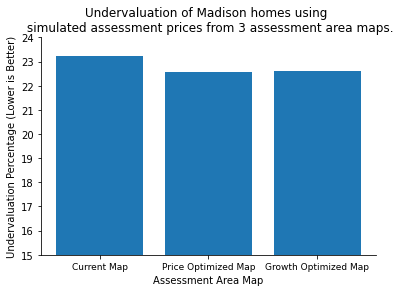

In [318]:
market_price_undervaluation = {
    "Current Map": 23.23,
    "Price Optimized Map": 22.55,
    "Growth Optimized Map": 22.59,
}
methods = list(market_price_undervaluation.keys())
values = list(market_price_undervaluation.values())
fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(15, 24)
plt.xticks([0, 1, 2], methods, rotation=0, fontsize=9)
ax.set_title("Undervaluation of Madison homes using \n simulated assessment prices from 3 assessment area maps.")
ax.set_xlabel("Assessment Area Map")
ax.set_ylabel("Undervaluation Percentage (Lower is Better)")
ax.bar(methods, values)
fig.savefig("hoopla.svg")